Imports

In [85]:
import os
import inspect
from translation import FJSSPInstancesTranslator, SequenceGAEncoder
from model import Order, ProductionEnvironment
import matplotlib.pyplot as plt

Setup

In [86]:
def read_file(source : str, id : int, path : str) -> list[str]:
    if source.startswith('0'):
        target_file = f'Behnke{id}.fjs'
    elif source.startswith('1'):
        target_file = f'BrandimarteMk{id}.fjs'
    elif source.startswith('2a'):
        target_file = f'HurinkSdata{id}.fjs'
    elif source.startswith('2b'):
        target_file = f'HurinkEdata{id}.fjs'
    elif source.startswith('2c'):
        target_file = f'HurinkRdata{id}.fjs'
    elif source.startswith('2d'):
        target_file = f'HurinkVdata{id}.fjs'
    elif source.startswith('3'):
        target_file = f'DPpaulli{id}.fjs'
    elif source.startswith('4'):
        target_file = f'ChambersBarnes{id}.fjs'
    elif source.startswith('5'):
        target_file = f'Kacem{id}.fjs'
    elif source.startswith('6'):
        target_file = f'Fattahi{id}.fjs'
    path += f'{source}\\{target_file}'
    file = open(path, 'r')
    return file.readlines()

In [87]:
def get_max_dissimilarity(available_workstations, operations):
    return len(operations) + sum([len(x) for x in available_workstations])

def get_approximate_max_dissimilarity(n_jobs, jobs, avg_machines):
    return sum([int(j.split(' ')[0]) for j in jobs]) + sum([int(j.split(' ')[0]) * float(avg_machines) for j in jobs])

Load Data

In [88]:
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
read_path = 'C:/Users/huda/Documents/GitHub/scheduling_model/code/external_test_data/FJSSPinstances/'

sources = ['0_BehnkeGeiger', '1_Brandimarte', '2a_Hurink_sdata', '2b_Hurink_edata', '2c_Hurink_rdata', '2d_Hurink_vdata', '3_DPpaulli', '4_ChambersBarnes', '5_Kacem', '6_Fattahi']

scores = []
source_scores = []
for benchmark_source in sources:
    full_path = read_path + benchmark_source + '/'
    source_scores.append([])
    for i in range(len(os.listdir(full_path))):
        file_content : list[str] = read_file(benchmark_source, i+1, read_path)
        values = file_content[0].split(' ')
        workstation_amount = int(values[1])
        average_workstations = float(values[2])

        max_dissimilarity = get_approximate_max_dissimilarity(values[0], file_content[1:], values[2])

        scores.append([f'{benchmark_source}{i+1}', average_workstations/workstation_amount, values[0], values[1], values[2], max_dissimilarity])
        source_scores[-1].append(scores[-1])


Analysis

In [89]:
beta = [x[1] for x in scores]
approx_max_dissimilarity = [x[5] for x in scores]
n_jobs = [int(x[2]) for x in scores]
n_machines = [int(x[3]) for x in scores]

Text(0.5, 1.0, 'Beta-Values and Approximate Maximum Dissimilarity Scores')

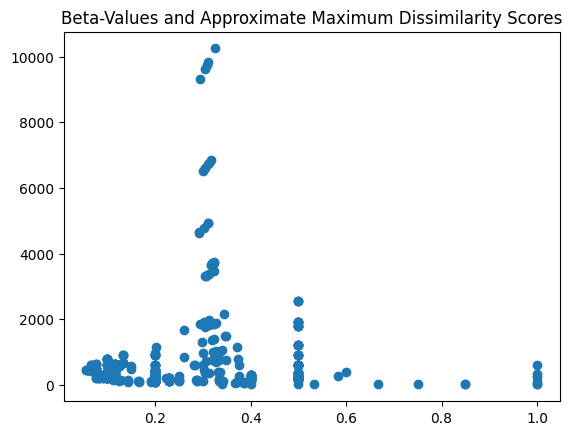

In [90]:
plt.scatter(beta, approx_max_dissimilarity)
plt.xlabel = 'Beta_Values'
plt.ylabel = 'Approx. Max Dissimilarity'
plt.title('Beta-Values and Approximate Maximum Dissimilarity Scores')

Text(0.5, 1.0, 'Number of jobs and Number of machines')

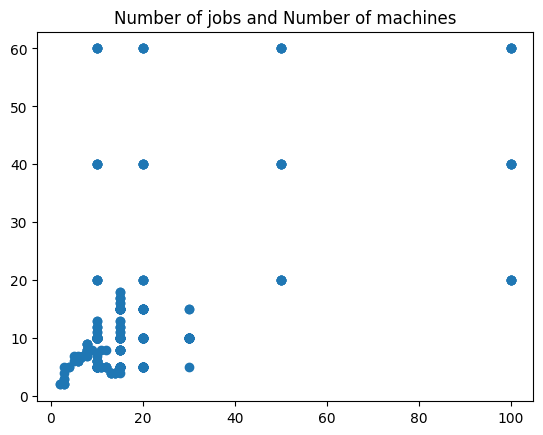

In [91]:
plt.scatter(n_jobs, n_machines)
plt.xlabel = 'n_jobs'
plt.ylabel = 'n_machines'
plt.title('Number of jobs and Number of machines')

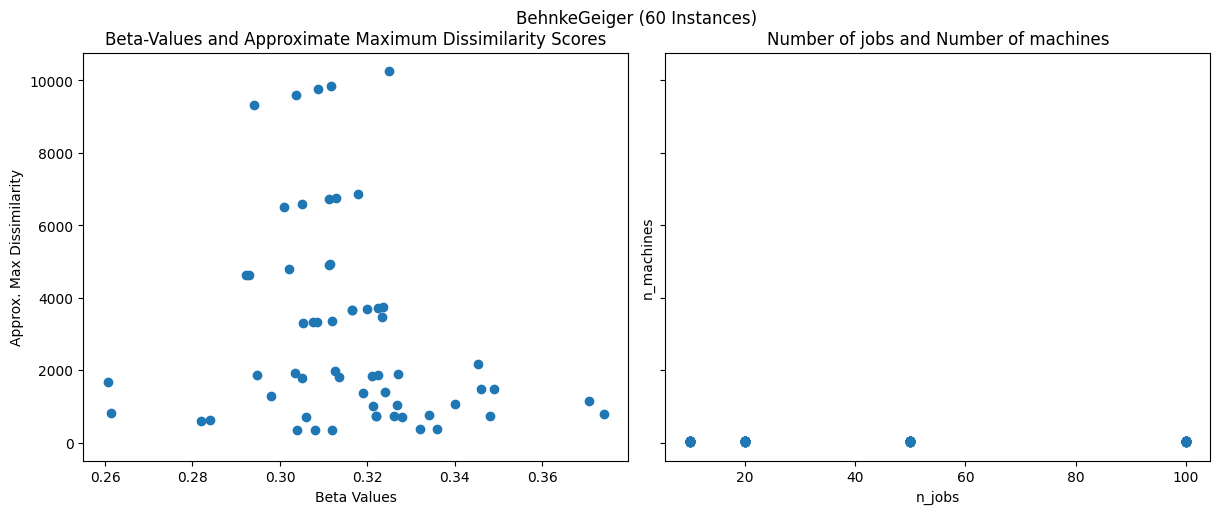

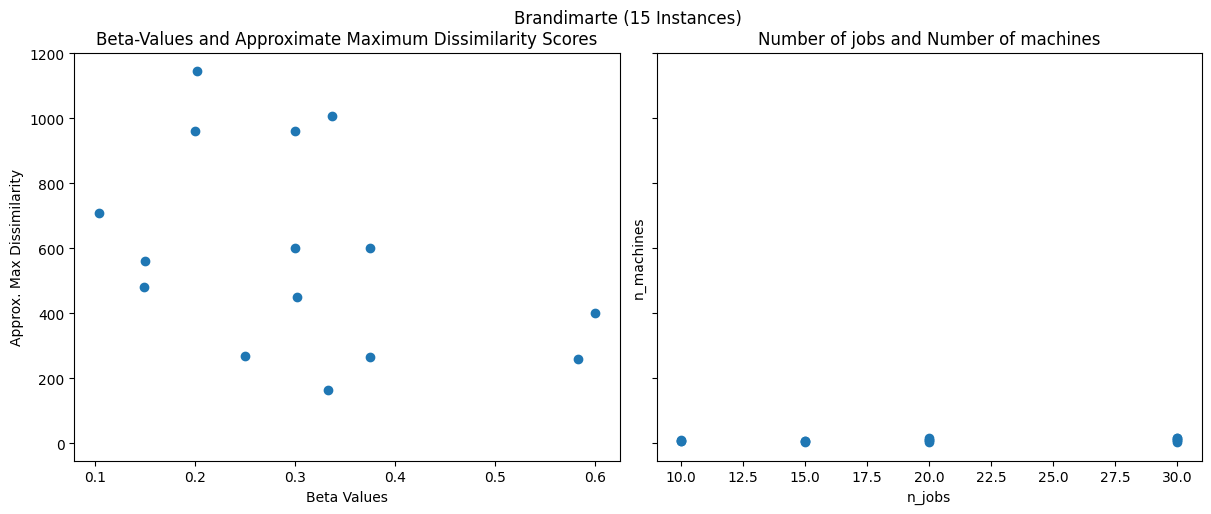

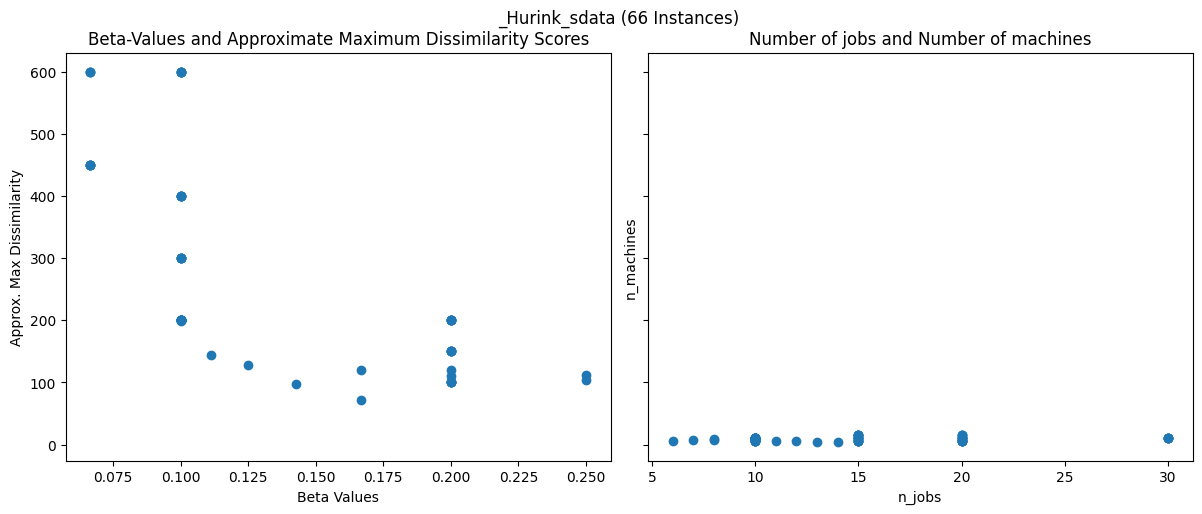

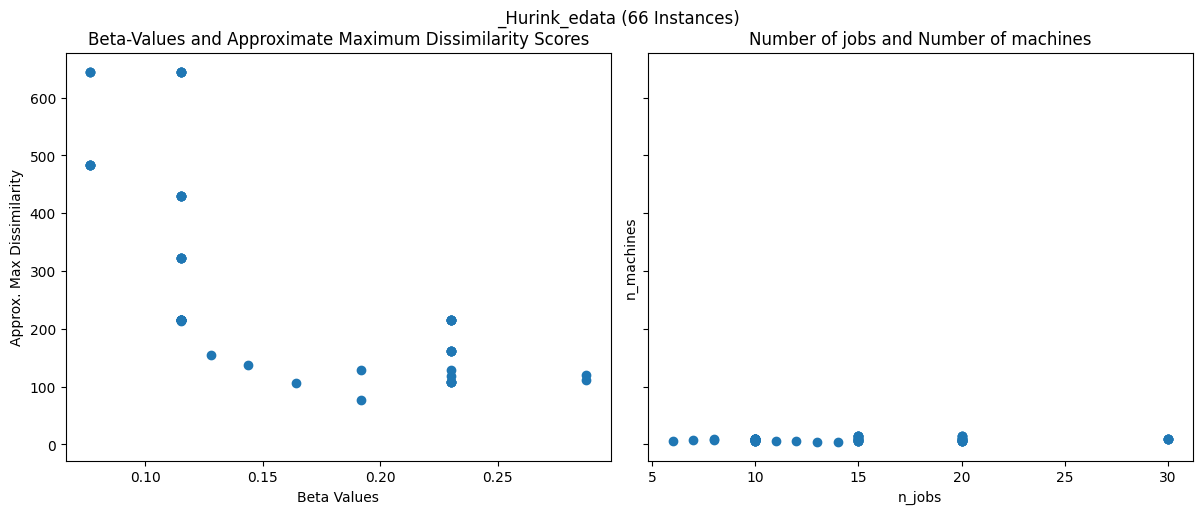

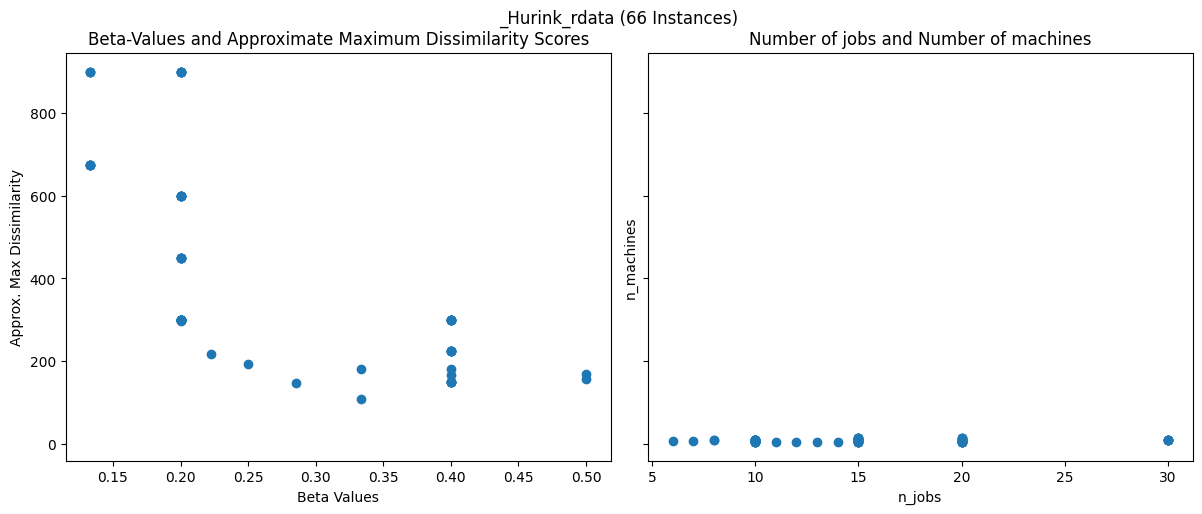

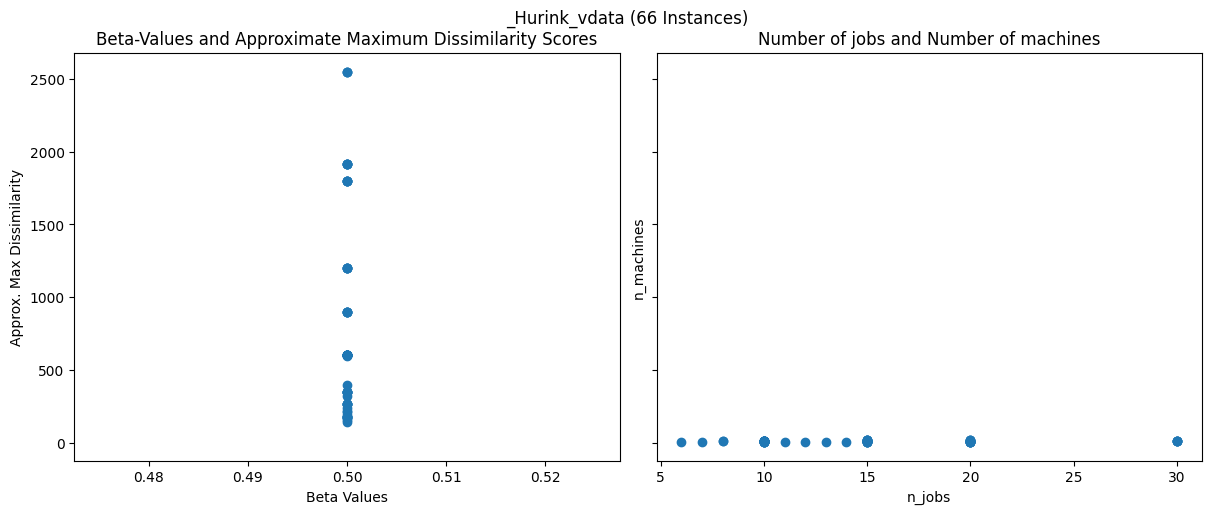

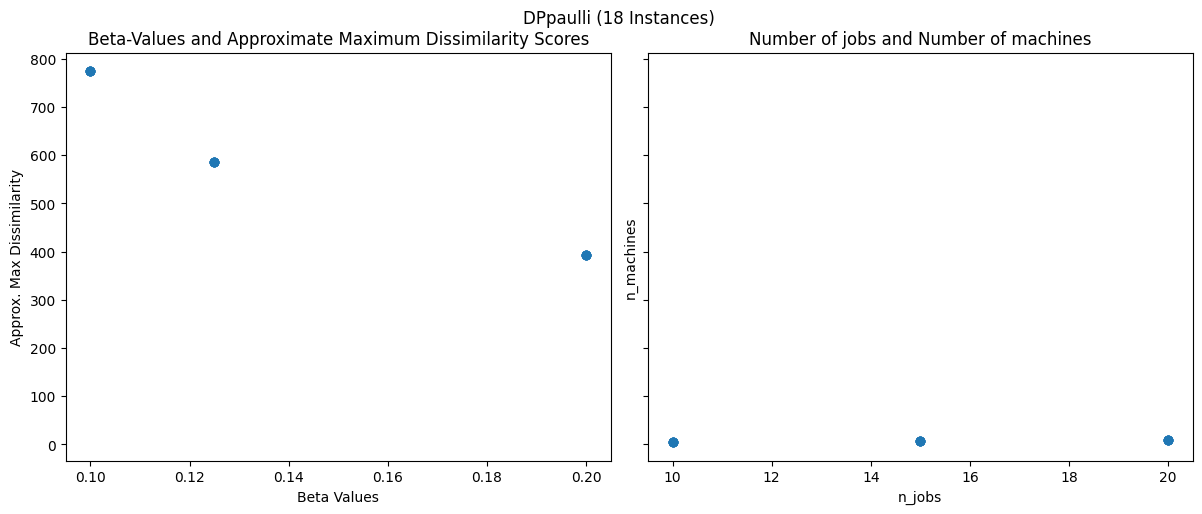

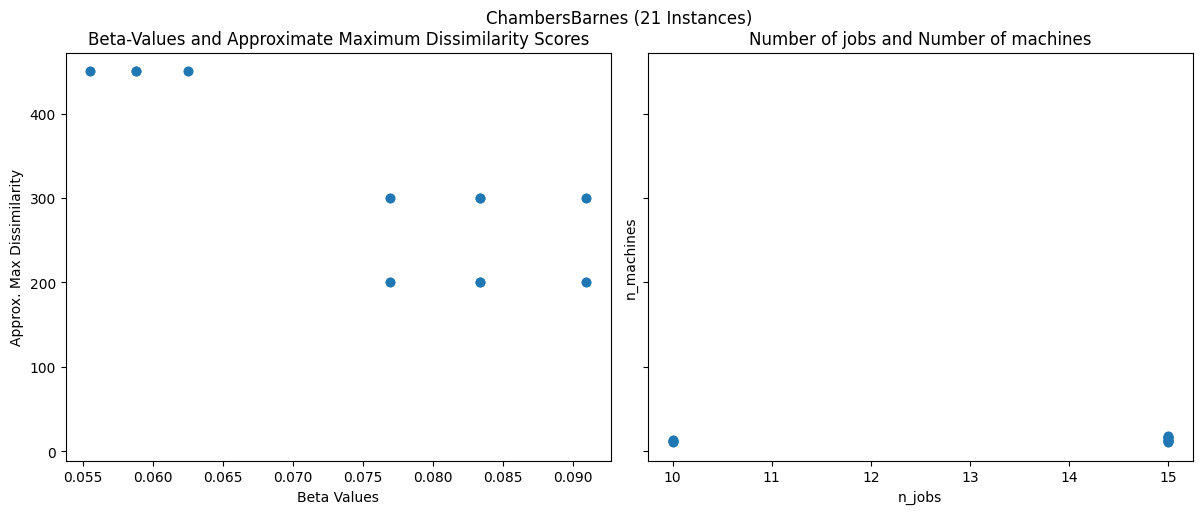

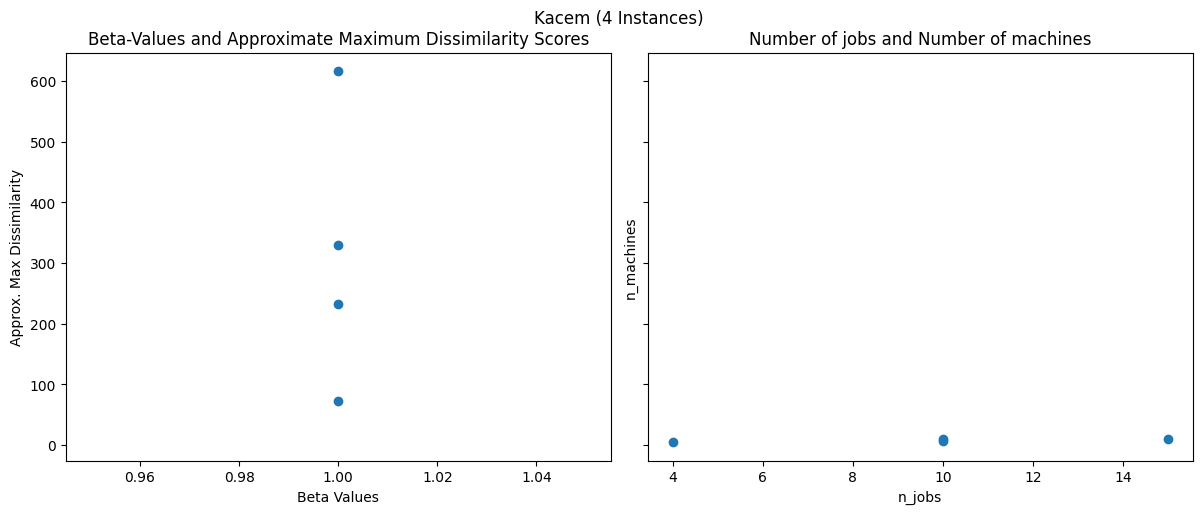

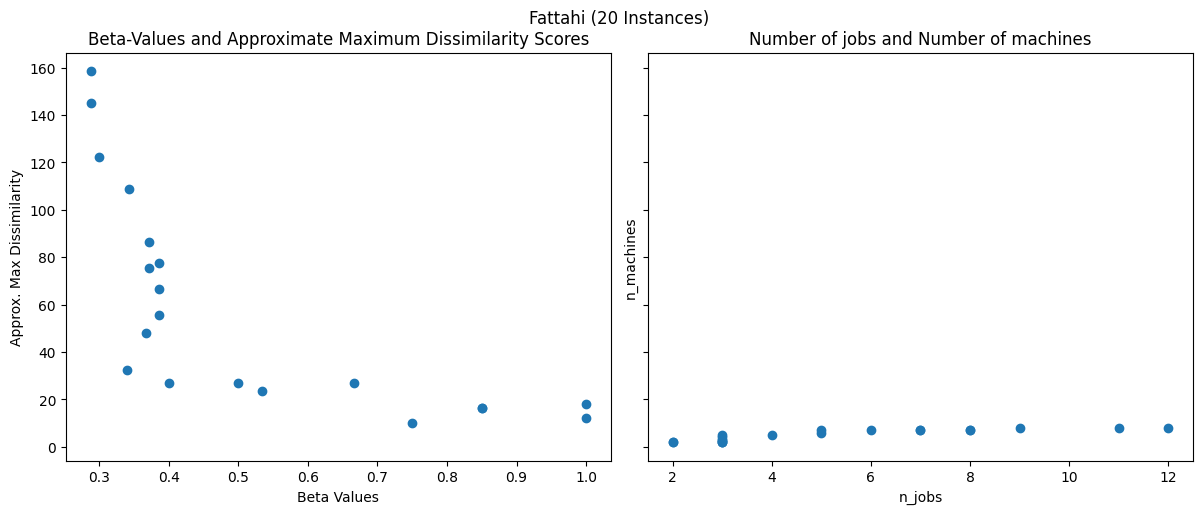

In [118]:
for i in range(len(source_scores)):
    beta = [x[1] for x in source_scores[i]]
    approx_max_dissimilarity = [x[5] for x in source_scores[i]]
    n_jobs = [int(x[2]) for x in source_scores[i]]
    n_machines = [int(x[3]) for x in source_scores[i]]
    fig, axs = plt.subplots(1,2, figsize=(12,5))
    fig.suptitle(f'{source_scores[i][0][0][2:-1]} ({len(source_scores[i])} Instances)')
    fig.tight_layout()
    ax1, ax2 = axs
    ax1.scatter(beta, approx_max_dissimilarity)
    ax1.set_xlabel('Beta Values')
    ax1.set_ylabel('Approx. Max Dissimilarity')
    ax1.set_title('Beta-Values and Approximate Maximum Dissimilarity Scores')

    ax2.scatter(n_jobs, n_machines)
    ax2.set_xlabel('n_jobs')
    ax2.set_ylabel('n_machines')
    ax2.set_title('Number of jobs and Number of machines')

    plt.show()